In [1]:
import speech_recognition as sr
import glob
import os
import numpy as np
import pandas as pd
from datetime import datetime
from pydub import AudioSegment

## get category labels

In [2]:
df = pd.read_csv('data/skyhacks_hackathon_dataset/training_labels.csv')

In [4]:
categories = list(df.columns)[1:]

translation = ['park rozrywki',
               'zwierzęta',
               'ławka',
               'budynek',
               'zamek',
                'jaskinia',
              'kościół',
              'miasto',
              'krzyż',
              'instytucja kultury',  # kultura
              'jedzenie',
               'chodnik',
              'las',
              'meble',
              'trawa',
              'cmentarz',
              'jezioro',
              'kopalnia',
              'pomnik',
              'pojazd mechaniczny',  # pojazd
               'góry',
               'muzeum',
               'skansen',
               'park',
               'osoba',
               'rośliny',
               'rezerwuar',
               'rzeka',
               'droga',
               'skały',
               'śnieg',
               'sport',
               'obiekt sportowy',
               'schody',
               'drzewa',
               'statek',
               'okna'
              ]
dictionary_categories = dict(zip(translation, categories))
dictionary_categories

{'park rozrywki': 'Amusement park',
 'zwierzęta': 'Animals',
 'ławka': 'Bench',
 'budynek': 'Building',
 'zamek': 'Castle',
 'jaskinia': 'Cave',
 'kościół': 'Church',
 'miasto': 'City',
 'krzyż': 'Cross',
 'instytucja kultury': 'Cultural institution',
 'jedzenie': 'Food',
 'chodnik': 'Footpath',
 'las': 'Forest',
 'meble': 'Furniture',
 'trawa': 'Grass',
 'cmentarz': 'Graveyard',
 'jezioro': 'Lake',
 'kopalnia': 'Landscape',
 'pomnik': 'Mine',
 'pojazd mechaniczny': 'Monument',
 'góry': 'Motor vehicle',
 'muzeum': 'Mountains',
 'skansen': 'Museum',
 'park': 'Open-air museum',
 'osoba': 'Park',
 'rośliny': 'Person',
 'rezerwuar': 'Plants',
 'rzeka': 'Reservoir',
 'droga': 'River',
 'skały': 'Road',
 'śnieg': 'Rocks',
 'sport': 'Snow',
 'obiekt sportowy': 'Sport',
 'schody': 'Sports facility',
 'drzewa': 'Stairs',
 'statek': 'Trees',
 'okna': 'Watercraft'}

## mp3 to wav file

In [11]:
for a, b, files in os.walk('data/audio_all/audio'):
    for file in files:
        try:
            dst = file.replace('.mp3', '.wav')
            sound = AudioSegment.from_mp3(os.path.join('data', 'audio_all', 'audio', file))
            sound.export(f'data/audio_all/audio_wav/{dst}', format="wav")
            os.remove(os.path.join('data', 'audio_all', 'audio', file))
        except:
            os.remove(os.path.join('data', 'audio_all', 'audio', file))

In [4]:
dst = 'data/audio_all/audio/aktywnie/15550/711155.wav'
sound = AudioSegment.from_mp3('data/audio_all/audio/aktywnie/15550/711155.mp3')
sound.export(dst, format="wav")

<_io.BufferedRandom name='data/audio_all/audio/aktywnie/15550/711155.wav'>

In [ ]:
r = sr.Recognizer()
all_dicts = dict()
for a, b, files in os.walk('data/audio_all/audio_wav'):
    for file in files:
        try:
            start_time = datetime.now()
            audio_file = sr.AudioFile(f'data/audio_all/audio_wav/{file}')
            with audio_file as source:
                audio = r.record(source)
            duration_max = audio_file.FRAME_COUNT / audio_file.SAMPLE_RATE
            dict_translations = dict()
            for start in np.arange(0, duration_max, 5):
                with audio_file as source:
                    audio = r.record(source, offset=start, duration=5)
                translation = r.recognize_google(audio, language='pl')
                dict_translations[start] = translation
            all_dicts[file] = dict_translations    
            end_time = datetime.now()

            print(file, end_time - start_time)
        except:
            print('Error occured')

710907.wav 0:00:36.934326
711920.wav 0:00:40.827997
711520.wav 0:00:48.915303
713128.wav 0:00:53.730767
713194.wav 0:00:32.946738
Error occured
712297.wav 0:00:34.106475
712185.wav 0:00:31.823044
710693.wav 0:00:32.765279
712278.wav 0:00:42.844266
710416.wav 0:00:39.290415
711907.wav 0:00:00.002254
712912.wav 0:00:00.001568
Error occured
710800.wav 0:00:31.799257
713393.wav 0:00:38.200942
711832.wav 0:00:33.261544
712173.wav 0:00:34.417001
Error occured
Error occured
711448.wav 0:00:42.286896
713396.wav 0:00:46.411127
712262.wav 0:00:00.002697
713159.wav 0:00:36.744864
710823.wav 0:00:42.662938
710562.wav 0:00:55.491193
Error occured
Error occured
711061.wav 0:00:42.255528
710854.wav 0:00:40.984809
625975.wav 0:14:24.854390
712674.wav 0:00:48.530387
712666.wav 0:00:00.003377
711955.wav 0:00:41.723099
Error occured
713246.wav 0:00:41.804394
711824.wav 0:00:36.237827
711834.wav 0:00:32.631033
Error occured
Error occured
Error occured
Error occured
711588.wav 0:00:34.036338
711370.wav 0:0

Error occured
Error occured
711214.wav 0:00:00.004969
713304.wav 0:00:34.183284
Error occured
712354.wav 0:00:35.612065
710749.wav 0:00:36.821270
711597.wav 0:00:35.522431
712376.wav 0:00:36.712872
713034.wav 0:00:38.107805
Error occured
Error occured
710546.wav 0:00:38.255506
Error occured
711497.wav 0:00:42.198019
Error occured
712201.wav 0:00:33.128413
712958.wav 0:00:50.053343
710530.wav 0:00:37.489982
710580.wav 0:00:38.726515
Error occured
712187.wav 0:00:38.415096
711457.wav 0:00:40.591279
712980.wav 0:00:36.932163
713314.wav 0:00:00.004533
712557.wav 0:00:48.545505
Error occured
Error occured
Error occured
710364.wav 0:00:33.656050
Error occured
710976.wav 0:00:00.004913
712504.wav 0:00:49.320663
Error occured
Error occured
Error occured
711338.wav 0:00:53.239698
713200.wav 0:00:38.252404
Error occured
Error occured
713181.wav 0:00:39.966759
712886.wav 0:00:42.731541
Error occured
711430.wav 0:00:54.055812
711483.wav 0:00:00.004685
711648.wav 0:00:42.899632
Error occured
712947

In [7]:
dict_translations

{0.0: 'wielka rafa koralowa u wybrzeży Australii Morze Czerwone',
 5.0: 'tribiotyk oto Wodny Raj dla wszystkich wielbicieli nurkowania',
 10.0: 'w Polsce Odpowiedź jest oczywista koparki',
 15.0: 'nurkowa na Zalewie Gródek w Jaworznie Szczakowej',
 20.0: 'przejrzysta a na dnie zalewu czekają emocjonujący niespodzianki',
 25.0: 'wielkimi koparkami na czele zaplecze na brzegu zapewnia',
 30.0: 'niebezpieczeństwo na początku tyłu kamieniołom w którym',
 35.0: 'materiał budowlany jakim jest Dolomit w połowie',
 40.0: 'ubiegłego stulecia firma wpadła w tarapaty finansowe',
 45.0: 'zaczęła zalegać z opłatami za prąd elektrownia',
 50.0: 'bezwzględna i odcięła zasilanie na konsekwencje Nietzsche',
 55.0: 'stanęły pompy odprowadzające wodę po 6',
 60.0: 'kamieniołom zamienił się w malownicze jezioro w nocy',
 65.0: 'odkryty przez płetwonurków co takiego przyciąga ich do Jawor',
 70.0: 'na pewno woda Szmaragdowa przejrzysta na kilkanaście metrów',
 75.0: 'a także efektowny urwiska skalne ale pr

## NLP

In [8]:
import spacy
from scipy import spatial
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nlp = spacy.load("pl_core_news_lg")

In [9]:
categories_pl = list(dictionary_categories.keys())
nlp(categories_pl[0])

park rozrywki

In [ ]:
dictionary_categories.keys()

## Cosine similarity

In [42]:
categories_pl = list(dictionary_categories.keys())
for key, value in dict_translations.items():
    tokens = nlp(value)
    for token in tokens:
        for category in categories_pl:
            token_category = nlp(category)
            if token.similarity(token_category) > 0.2:
                print(token.similarity(token_category), token, token_category)

0.21868304493277352 wielka jaskinia
0.2016599949519392 wielka instytucja kultury
0.22519262787958846 wielka jedzenie
0.2104913993193156 wielka trawa
0.2158916267248103 wielka kopalnia
0.27162756877362804 wielka rzeka
0.2663432804726559 wielka droga
0.20855443330472728 wielka sport
0.32398290791760387 rafa ławka
0.5370372179285084 rafa jaskinia
0.24892831145956132 rafa las
0.38776557667302486 rafa trawa
0.35099736137890836 rafa jezioro
0.27817299982619037 rafa kopalnia
0.23640040047204805 rafa osoba
0.40502439771228665 rafa rzeka
0.3014343097608956 rafa droga
0.29991662258619706 rafa skały
0.2254626098979129 rafa statek
0.21123636118095 koralowa park rozrywki
0.25818068091892293 koralowa ławka
0.42442084513171985 koralowa jaskinia
0.2348352924664446 koralowa las
0.39842248747281106 koralowa trawa
0.32273309427252983 koralowa jezioro
0.233420728003078 koralowa kopalnia
0.22023327560975195 koralowa park
0.2872613292987081 koralowa rośliny
0.28150038078376416 koralowa rzeka
0.3573746492581

<ipython-input-42-829571a04b5f>:7: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  if token.similarity(token_category) > 0.2:


0.29497162371005997 Wodny park rozrywki
0.27783884939515835 Wodny jezioro
0.2786300207526362 Wodny park
0.2678166998039662 Wodny rzeka
0.3732522347630368 Wodny obiekt sportowy
0.3311050645624079 Raj park rozrywki
0.21998332780411856 Raj zamek
0.2673145238996885 Raj jaskinia
0.21203201760053908 Raj kościół
0.3264276841873293 Raj las
0.23001422154313705 Raj cmentarz
0.215767789302173 Raj jezioro
0.26040558655046825 Raj pomnik
0.35155425783320726 Raj skansen
0.3598380824466612 Raj park
0.22762545004836485 Raj śnieg
0.20672219323602456 dla instytucja kultury
0.22365417136496013 dla jedzenie
0.2702992807589096 dla rezerwuar
0.22935970834169386 dla sport
0.3149072959086819 wszystkich zwierzęta
0.3464102967628928 wszystkich instytucja kultury
0.36212627667179464 wszystkich jedzenie
0.2139088162025343 wszystkich rezerwuar
0.278965304329771 wielbicieli park rozrywki
0.24400925107465385 wielbicieli zwierzęta
0.2192606342193505 wielbicieli miasto
0.23794775389943598 wielbicieli instytucja kultury

0.2714568075367772 którym zwierzęta
0.22789619859457327 którym instytucja kultury
0.21930115596624225 którym jedzenie
0.20730726123183307 którym muzeum
0.24092170240104965 którym obiekt sportowy
0.250138593611031 którym drzewa
0.28489543564771014 materiał budynek
0.2632145346565471 materiał zamek
0.2410178446087608 materiał chodnik
0.44525001675763526 materiał pojazd mechaniczny
0.24487305339725204 materiał rośliny
0.26132967534680773 materiał rezerwuar
0.20279937451993682 materiał śnieg
0.23818239212882214 materiał sport
0.42833772372937495 materiał obiekt sportowy
0.23039363282653816 materiał statek
0.3969490878955563 budowlany budynek
0.21405561227609268 budowlany kościół
0.27537430959148 budowlany instytucja kultury
0.2796525831068105 budowlany chodnik
0.26459976876609226 budowlany meble
0.3123904483994107 budowlany kopalnia
0.43083500743094666 budowlany pojazd mechaniczny
0.2071715946727008 budowlany park
0.4709231165668774 budowlany obiekt sportowy
0.26737838609701864 budowlany s

0.2079102719848676 odkryty rzeka
0.2736657496785409 odkryty skały
0.2879871259879482 odkryty obiekt sportowy
0.20201693015377611 odkryty drzewa
0.22215484931540821 odkryty statek
0.24926741317341106 przez zwierzęta
0.3296686037196878 przez instytucja kultury
0.21989925011073547 przez jedzenie
0.2189080996889497 przez pojazd mechaniczny
0.21475359627321458 przez drzewa
0.26027137996219674 płetwonurków jaskinia
0.2616029671706173 płetwonurków jezioro
0.2017542298818748 płetwonurków pojazd mechaniczny
0.2946373467752975 płetwonurków skały
0.21032777428050792 płetwonurków sport
0.24198134690303172 płetwonurków obiekt sportowy
0.32344663562002646 płetwonurków statek
0.29922867382921847 co jedzenie
0.2338119767055671 takiego instytucja kultury
0.3091222309432004 takiego jedzenie
0.24848137778095197 przyciąga park rozrywki
0.24179229469855826 przyciąga zwierzęta
0.23795013476188054 przyciąga miasto
0.26643647460973957 przyciąga instytucja kultury
0.3121941155338569 przyciąga jedzenie
0.205940

0.20734142454578103 rozmontować schody
0.2085470616647557 rozmontować drzewa
0.25308138309970835 i zwierzęta
0.3118899157456319 i jedzenie
0.21533488216838767 wywieźć rezerwuar
0.29234778957036084 całego instytucja kultury
0.2609176952397973 całego jedzenie
0.20073372183217655 sprzętu park rozrywki
0.22471824473125446 sprzętu jedzenie
0.20092714113060026 sprzętu meble
0.3918562990930901 sprzętu pojazd mechaniczny
0.21954118860379052 sprzętu rezerwuar
0.20899301851698565 sprzętu sport
0.28959244454228034 sprzętu obiekt sportowy
0.2835257205656996 pozostawiając zwierzęta
0.23131633924054684 pozostawiając instytucja kultury
0.34772493647039915 pozostawiając jedzenie
0.21093303787452367 pozostawiając pojazd mechaniczny
0.22379094338612399 pozostawiając rośliny
0.260942028139526 pozostawiając skały
0.32359907463258436 pozostawiając drzewa
0.2468374948669835 mini park rozrywki
0.24073645717215245 mini ławka
0.25688779843078624 dwie schody
0.20366049929361146 olbrzymie park rozrywki
0.2902482

0.20291505104556096 już góry
0.22617639340764953 już śnieg
0.20807865037074763 dwa schody
0.25595749051723654 samochody park rozrywki
0.41469521388559094 samochody zwierzęta
0.36769787604853316 samochody miasto
0.3497931216643943 samochody jedzenie
0.22574882832739257 samochody chodnik
0.44473019920071744 samochody meble
0.506096364478942 samochody pojazd mechaniczny
0.24837518100722383 samochody rośliny
0.20641621082563558 samochody skały
0.2379065493757424 samochody sport
0.2792212879072458 samochody obiekt sportowy
0.44563429763543283 samochody schody
0.2814316674572559 samochody drzewa
0.20801175350936496 samochody statek
0.324325506937226 samochody okna
0.23722915219571566 samolot park rozrywki
0.3689144538786741 samolot budynek
0.32117963289452456 samolot zamek
0.2344774169057225 samolot kościół
0.2576862464806161 samolot krzyż
0.27877153360364626 samolot chodnik
0.20674887166328595 samolot las
0.23344481025565092 samolot cmentarz
0.2520181325069329 samolot pomnik
0.5648834748238

0.29329896418552104 profesjonalna instytucja kultury
0.27796339723155256 profesjonalna jedzenie
0.2722427601716714 profesjonalna meble
0.21427425266776257 profesjonalna pojazd mechaniczny
0.299992214004144 profesjonalna sport
0.2901587485972601 profesjonalna obiekt sportowy
0.22967450795366529 bez jedzenie
0.25547950640166406 powodu jedzenie
0.2043882407107458 powodu drzewa
0.21760047244398129 jeśli zwierzęta
0.3187428780690696 jeśli jedzenie
0.20559370224854373 jeśli góry
0.2629686840830176 jeśli osoba
0.22726833717980838 w instytucja kultury
0.2487631771288277 Polsce miasto
0.49544265787858793 Polsce instytucja kultury
0.2564005587566057 Polsce muzeum
0.2007825337656531 Polsce sport
0.2060373154766275 nurkować park rozrywki
0.259725292665337 nurkować zwierzęta
0.2038114669836074 nurkować jaskinia
0.3174489284980152 nurkować jedzenie
0.25018992127958306 nurkować jezioro
0.2884355848422396 nurkować góry
0.2277821874635023 nurkować rezerwuar
0.2831833072571963 nurkować skały
0.259135981

In [12]:
x = nlp.vocab['wszystkich'].vector

In [13]:
y = nlp.vocab['jedzenie'].vector

In [14]:
1 - spatial.distance.cosine(x, y)

0.3621262311935425

## Wordcloud from text

In [20]:
string_out = str()
for key, value in dict_translations.items():
    string_out += f" {value}"


In [36]:
stopwords_ = ['ach', 'aj', 'albo', 'bardzo', 'bez', 'bo', 'być', 'ci', 'cię', 'ciebie', 'co', 'czy', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokąd', 'dość', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dziś', 'dzisiaj', 'gdyby', 'gdzie', 'go', 'ich', 'ile', 'im', 'inny', 'ja', 'ją', 'jak', 'jakby', 'jaki', 'je', 'jeden', 'jedna', 'jedno', 'jego', 'jej', 'jemu', 'jeśli', 'jest', 'jestem', 'jeżeli ', 'już', 'każdy', 'kiedy', 'kierunku', 'kto', 'ku', 'lub', 'ma', 'mają', 'mam', 'mi', 'mną', 'mnie', 'moi', 'mój', 'moja', 'moje', 'może', 'mu', 'my', 'na', 'nam', 'nami', 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'natychmiast', 'nią', 'nic', 'nich', 'nie', 'niego', 'niej', 'niemu', 'nigdy', 'nim', 'nimi', 'niż', 'obok', 'od', 'około', 'on', 'ona', 'one', 'oni', 'ono', 'owszem', 'po \tpod', 'ponieważ', 'przed', 'przedtem', 'są', 'sam', 'sama', 'się', 'skąd', 'tak', 'taki', 'tam', 'ten', 'to', 'tobą', 'tobie', 'tu', 'tutaj', 'twoi', 'twój', 'twoja', 'twoje', 'ty', 'wam', 'wami', 'was', 'wasi', 'wasz', 'wasza', 'wasze', 'we', 'więc', 'wszystko', 'wtedy', 'wy', 'żaden', 'zawsze', 'że']

In [38]:
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords_).generate(string_out)

(-0.5, 799.5, 399.5, -0.5)

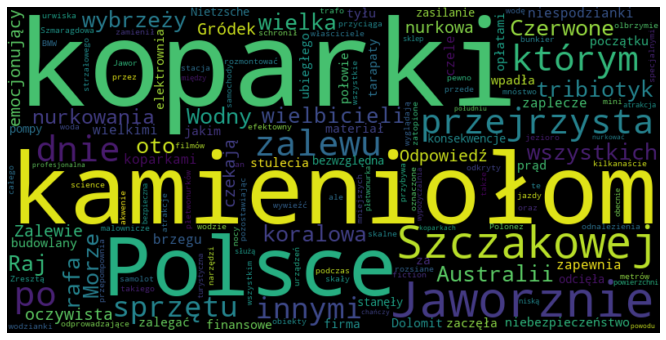

In [39]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [41]:
wordcloud.words_

{'koparki': 1.0,
 'kamieniołom': 1.0,
 'Polsce': 0.6666666666666666,
 'Jaworznie': 0.6666666666666666,
 'Szczakowej': 0.6666666666666666,
 'przejrzysta': 0.6666666666666666,
 'dnie': 0.6666666666666666,
 'zalewu': 0.6666666666666666,
 'którym': 0.6666666666666666,
 'po': 0.6666666666666666,
 'sprzętu': 0.6666666666666666,
 'innymi': 0.6666666666666666,
 'wielka': 0.3333333333333333,
 'rafa': 0.3333333333333333,
 'koralowa': 0.3333333333333333,
 'wybrzeży': 0.3333333333333333,
 'Australii': 0.3333333333333333,
 'Morze': 0.3333333333333333,
 'Czerwone': 0.3333333333333333,
 'tribiotyk': 0.3333333333333333,
 'oto': 0.3333333333333333,
 'Wodny': 0.3333333333333333,
 'Raj': 0.3333333333333333,
 'wszystkich': 0.3333333333333333,
 'wielbicieli': 0.3333333333333333,
 'nurkowania': 0.3333333333333333,
 'Odpowiedź': 0.3333333333333333,
 'oczywista': 0.3333333333333333,
 'nurkowa': 0.3333333333333333,
 'Zalewie': 0.3333333333333333,
 'Gródek': 0.3333333333333333,
 'czekają': 0.3333333333333333,
 

In [40]:
wordcloud.stopwords

['ach',
 'aj',
 'albo',
 'bardzo',
 'bez',
 'bo',
 'być',
 'ci',
 'cię',
 'ciebie',
 'co',
 'czy',
 'daleko',
 'dla',
 'dlaczego',
 'dlatego',
 'do',
 'dobrze',
 'dokąd',
 'dość',
 'dużo',
 'dwa',
 'dwaj',
 'dwie',
 'dwoje',
 'dziś',
 'dzisiaj',
 'gdyby',
 'gdzie',
 'go',
 'ich',
 'ile',
 'im',
 'inny',
 'ja',
 'ją',
 'jak',
 'jakby',
 'jaki',
 'je',
 'jeden',
 'jedna',
 'jedno',
 'jego',
 'jej',
 'jemu',
 'jeśli',
 'jest',
 'jestem',
 'jeżeli ',
 'już',
 'każdy',
 'kiedy',
 'kierunku',
 'kto',
 'ku',
 'lub',
 'ma',
 'mają',
 'mam',
 'mi',
 'mną',
 'mnie',
 'moi',
 'mój',
 'moja',
 'moje',
 'może',
 'mu',
 'my',
 'na',
 'nam',
 'nami',
 'nas',
 'nasi',
 'nasz',
 'nasza',
 'nasze',
 'natychmiast',
 'nią',
 'nic',
 'nich',
 'nie',
 'niego',
 'niej',
 'niemu',
 'nigdy',
 'nim',
 'nimi',
 'niż',
 'obok',
 'od',
 'około',
 'on',
 'ona',
 'one',
 'oni',
 'ono',
 'owszem',
 'po \tpod',
 'ponieważ',
 'przed',
 'przedtem',
 'są',
 'sam',
 'sama',
 'się',
 'skąd',
 'tak',
 'taki',
 'tam',
 'ten'